In [205]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import poisson
from scipy.stats import uniform
import statistics

Salariul mediu orar al fermierilor din *** este de 13.5 lei. Se stie ca σ=2.9 lei. Calculati si interpretati eroarea standard a mediei pentru un esantion de marime 30.

In [141]:
def eroarea_standard_a_mediei(abat_medie_patratica, n):
    return abat_medie_patratica/sqrt(n)

In [36]:
eroarea_standard_a_mediei(2.9, 30)

0.5294651389216606

Valoarea mică a erorii standard a mediei pentru eșantionul de mărime 30 presupune o distribuție teoretică mai uniformă.

Presupunem ca avem un esantion care contine randamentul pe ultimele 30 de luni a unei companii X. Media acestor valori este de 2% si abaterea medie patratica a esantionului este de 20%. Calculati si interpretati eroarea standard a mediei esantionului.

Sa presupunem ca avem un esantion de 200 de masuratori, in aceleasi conditii. Care este eroarea standard?


In [38]:
eroarea_standard_a_mediei(20, 30)

3.6514837167011076

In [39]:
eroarea_standard_a_mediei(20, 200)

1.414213562373095

Așadar, cu cât mărimea eșantionului este mai mare, cu atât eroarea este mai mică.

O populatie are media 100 si abaterea medie patratica de 50. Se alege un esantion simplu de 100 de elemente.

a) Care e probabilitatea ca media esantionului sa fie la ±5 de media populatiei?  
b) Care e probabilitatea ca media esantionului sa fie la ±10 de media populatiei?  
c) Dar daca esantionul este de 400 de elemente? Care e probabilitatea ca media esantionului sa fie la distanta de ±5 de media populatiei?


**a)**

In [11]:
er = eroarea_standard_a_mediei(50, 100)

In [12]:
print(er)

5.0


In [13]:
def distr_normala_oarecare1(mu, e, er):
        return (mu - e - mu)/er

In [15]:
z95 = distr_normala_oarecare1(100, 5, er)

In [ ]:
print(z95)

-1.0


In [17]:
def distr_normala_oarecare2(mu, e, er):
        return (mu + e - mu)/er

In [20]:
z105 = distr_normala_oarecare2(100, 5, er)

In [21]:
print(z105)

1.0


Din tabel: $P(z<1)-P(z<-1)=0.8413-0.1587=0.6826$  
Probabilitatea ca media eșantionului să fie la ±5 de media populației este de 68.26%. 

**b)**

In [22]:
z90 = distr_normala_oarecare1(100, 10, er)

In [23]:
print(z90)

-2.0


In [25]:
z110 = distr_normala_oarecare2(100, 10, er)

In [26]:
print(z110)

2.0


Din tabel: $P(z<2)-P(z<-2)=0.0228-0.9772=0.9544$  
Probabilitatea ca media eșantionului să fie la ±10 de media populației este de 95.44%. 

**c)**

In [27]:
er2 = eroarea_standard_a_mediei(50, 400)

In [28]:
print(er2)

2.5


In [30]:
z95 = distr_normala_oarecare1(100, 5, er2)

In [31]:
print(z95)

-2.0


In [32]:
z105 = distr_normala_oarecare2(100, 5, er2)

In [33]:
print(z105)

2.0


Din tabel: $P(z<2)-P(z<-2)=0.0228-0.9772=0.9544$  
Probabilitatea ca media eșantionului să fie la ±10 de media populației este de 95.44%.

Sa se simuleze teorema limita centrala pornind de la o populatie care urmeaza o distributie:

3. Poisson, cu $\lambda=3$
1. uniforma, cu valori intre 5 si 100

    
Folositi pentru  marimea esantioanelor valorile $n= 10,20,30, 50, 1000$.

Pasi:
    
1. Stabiliti care este media $\mu$ si abaterea medie patratica a populatiei $\sigma$
2. Reprezentati grafic distributia populatiei (pmf) si a unui esantion aleator din populatie;
3. Extrageti esantioane aleatoare (multe!) de marime $n$ din populatie; 
4. Calculati media pentru fiecare esantion
5. Reprezentati distributia mediilor calculate la punctul anterior
6. Calculati media mediilor de la pct. 4. Comparati cu media populatie.
7. Calculati abaterea medie patratica a mediilor de la punctul 4. Comparati cu $\sigma/\sqrt(n)$
8. Reprezentati valoarea mediilor de la punctul 6 ca functie de $n$, $n= 10,20,...,1000$.
    
    

**Rezolvare:**

In a Poisson$(\lambda)$ distribution, $\lambda$ represents both, the expected value and variance.  
Expected value: $E(X)=\lambda$  
Varianța: $D(X)=\lambda$

Dar:  
Expected value: $E(X)=\mu=\lambda=3$  
Varianța: $D(X)=\sigma^{2}=\lambda=3$

In [5]:
lambda_variable = 3

In [6]:
media = lambda_variable
ab_medie_patratica = lambda_variable

In [7]:
print('Media populației este ' + str(media) + ', iar abaterea medie pătratică este ' + str(ab_medie_patratica))

Media populației este 3, iar abaterea medie pătratică este 3


In [184]:
x = poisson.rvs(mu=3, size=1000)

Text(0.5, 1.0, 'Distribuția populației (pmf)')

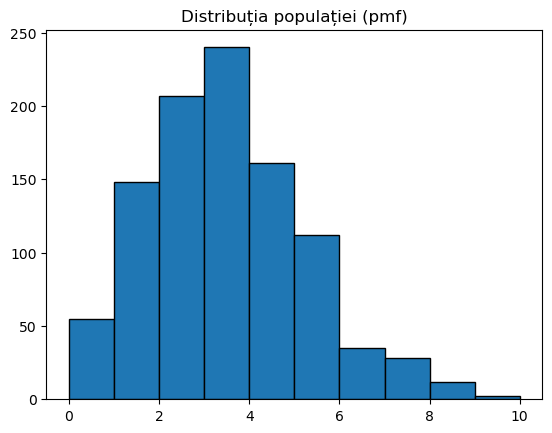

In [203]:
plt.hist(x, edgecolor='black')
plt.title(f'Distribuția populației (pmf)')

In [197]:
n = [10,20,30,50,1000]
means = []
for j in range(len(n)):
    y = np.random.uniform(5,100,n[j])
    print('Dimentiune eșantion {}: '.format(j), y.shape)
    means.append(np.mean(y))
print(means)

Dimentiune eșantion 0:  (10,)
Dimentiune eșantion 1:  (20,)
Dimentiune eșantion 2:  (30,)
Dimentiune eșantion 3:  (50,)
Dimentiune eșantion 4:  (1000,)
[70.47351715306455, 49.28925231210705, 50.76450764574036, 41.70877816464875, 51.97725126833232]


In [213]:
# plt.hist(means, bins=80)

In [199]:
total_mean = np.mean(means)

In [200]:
print(total_mean)

52.84266130877861


In [201]:
abaterea_medie_patratica = stdev(means)
print(abaterea_medie_patratica)
print('Abaterea medie pătratică > eroarea standard a mediei ?')
for j in range(len(n)):
    sigma_X = eroarea_standard_a_mediei(abaterea_medie_patratica, n[j])
    print('Cazul {}:'.format(j), abaterea_medie_patratica > sigma_X)

10.636080156148477
Abaterea medie pătratică > eroarea standard a mediei ?
Cazul 0: True
Cazul 1: True
Cazul 2: True
Cazul 3: True
Cazul 4: True


In [171]:
n = [i for i in range(10,1000+1,10)]

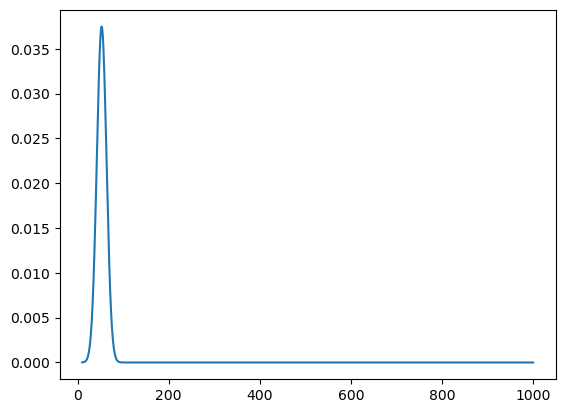

In [222]:
snd = stats.norm(total_mean, abaterea_medie_patratica)
a = np.linspace(10, 1000, 1000)
plt.plot(a, snd.pdf(a))